# Import Data

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
%matplotlib inline

### *What is the dataset, Library Collection Inventory?*
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

###### Item type : 

###### Publisher

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.
######

In [10]:
data = pd.read_csv("Checkouts_by_Title.csv", usecols = ['UsageClass', 'CheckoutType', 'MaterialType', 'CheckoutYear', 'CheckoutMonth','Checkouts', 'Title'], keep_default_na = True)
data.dataframeName = 'Checkouts_by_Title.csv'
nRows, nCol = data.shape
data.head(10)

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title
0,Physical,Horizon,BOOK,2013,4,1,American Diabetes Association complete guide t...
1,Physical,Horizon,SOUNDDISC,2013,4,3,The little red hen [sound recording] / book by...
2,Physical,Horizon,BOOK,2013,4,1,In the courts of the sun
3,Physical,Horizon,BOOK,2013,4,1,1942 the year that tried mens souls
4,Physical,Horizon,BOOK,2013,4,9,Mimi says no / Yih-Fen Chou ; pictures by Chih...
5,Physical,Horizon,BOOK,2013,4,1,Tombstone's Epitaph / [compiled by] Douglas D....
6,Physical,Horizon,BOOK,2013,4,1,Essays; edited with an introduction by Rosalin...
7,Digital,OverDrive,EBOOK,2013,4,5,"Jurassic Park: Jurassic Park Series, Book 1"
8,Physical,Horizon,BOOK,2013,4,1,Dodge Caravan & Plymouth Voyager automotive re...
9,Physical,Horizon,SOUNDDISC,2013,4,3,Please pass the guilt [sound recording] / by R...


### Identifying Missing Data, and Tidying Up Data: 

##### Here is the missing data for each of the columns we are concerned about. 'Author' values missing being the most 15.75 % of the total data. Followed by publication year & Publisher. In this case it would not make sense to fill in missing data as the missing values are specific to the item types, and so on... 

In [11]:
missing_values = data.isnull().sum()
missing_values

UsageClass       0
CheckoutType     0
MaterialType     0
CheckoutYear     0
CheckoutMonth    0
Checkouts        0
Title            0
dtype: int64

#### Data Tally 

In [19]:
MaterialType = data['MaterialType'].value_counts(ascending=True)
MaterialType = pd.DataFrame(MaterialType[-10:]).reset_index()
MaterialType.columns = ["MaterialType", "ItemCount"]
MaterialType

,MaterialType,ItemCount
0,MIXED,132354
1,SOUNDCASS,199742
2,MUSIC,272252
3,VIDEOCASS,499763
4,SONG,969118
5,AUDIOBOOK,2309311
6,VIDEODISC,3255631
7,SOUNDDISC,4178223
8,EBOOK,5463584
9,BOOK,20773284


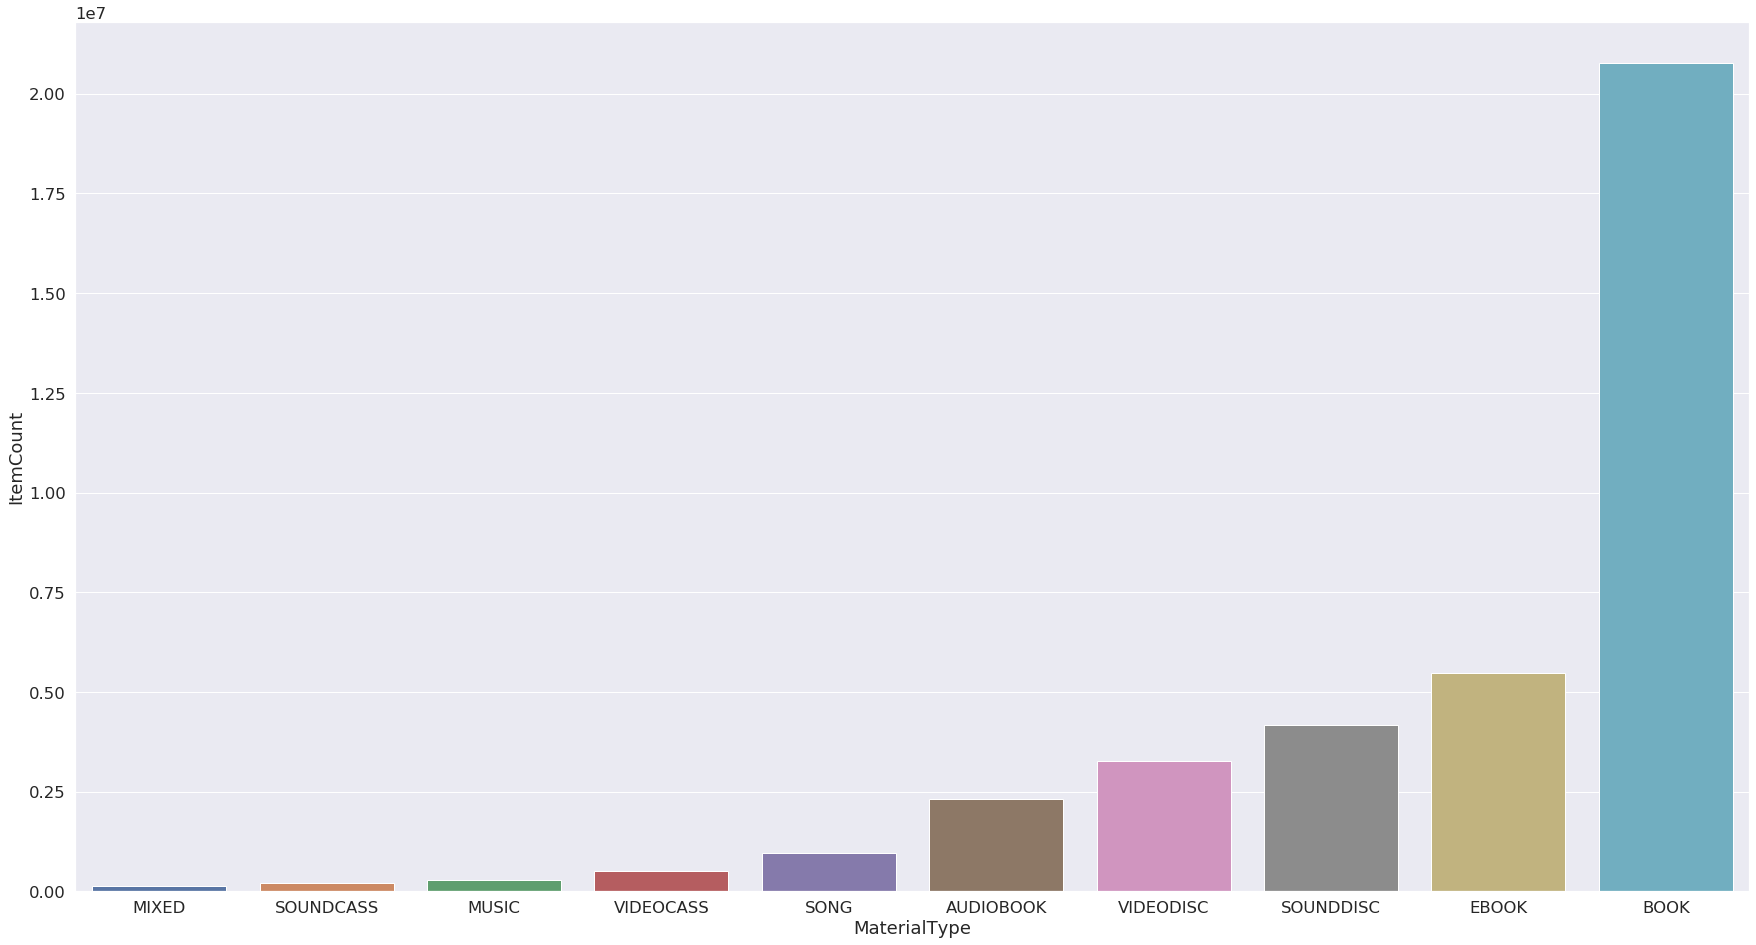

In [20]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='MaterialType',y='ItemCount', data=MaterialType)

### Trend of checkouts over the years since 2005

In [58]:
CheckoutYear = data['CheckoutYear'].value_counts(ascending=True)
CheckoutYear = pd.DataFrame(CheckoutYear[-50:]).reset_index()
CheckoutYear.columns = ["CheckoutYear", "ItemCount"]
CheckoutYear.tail(25)

,CheckoutYear,ItemCount
0,2005,1331652
1,2021,1436986
2,2020,1721376
3,2006,1938925
4,2007,2040106
5,2008,2136504
6,2010,2190185
7,2009,2226650
8,2011,2335873
9,2012,2397811


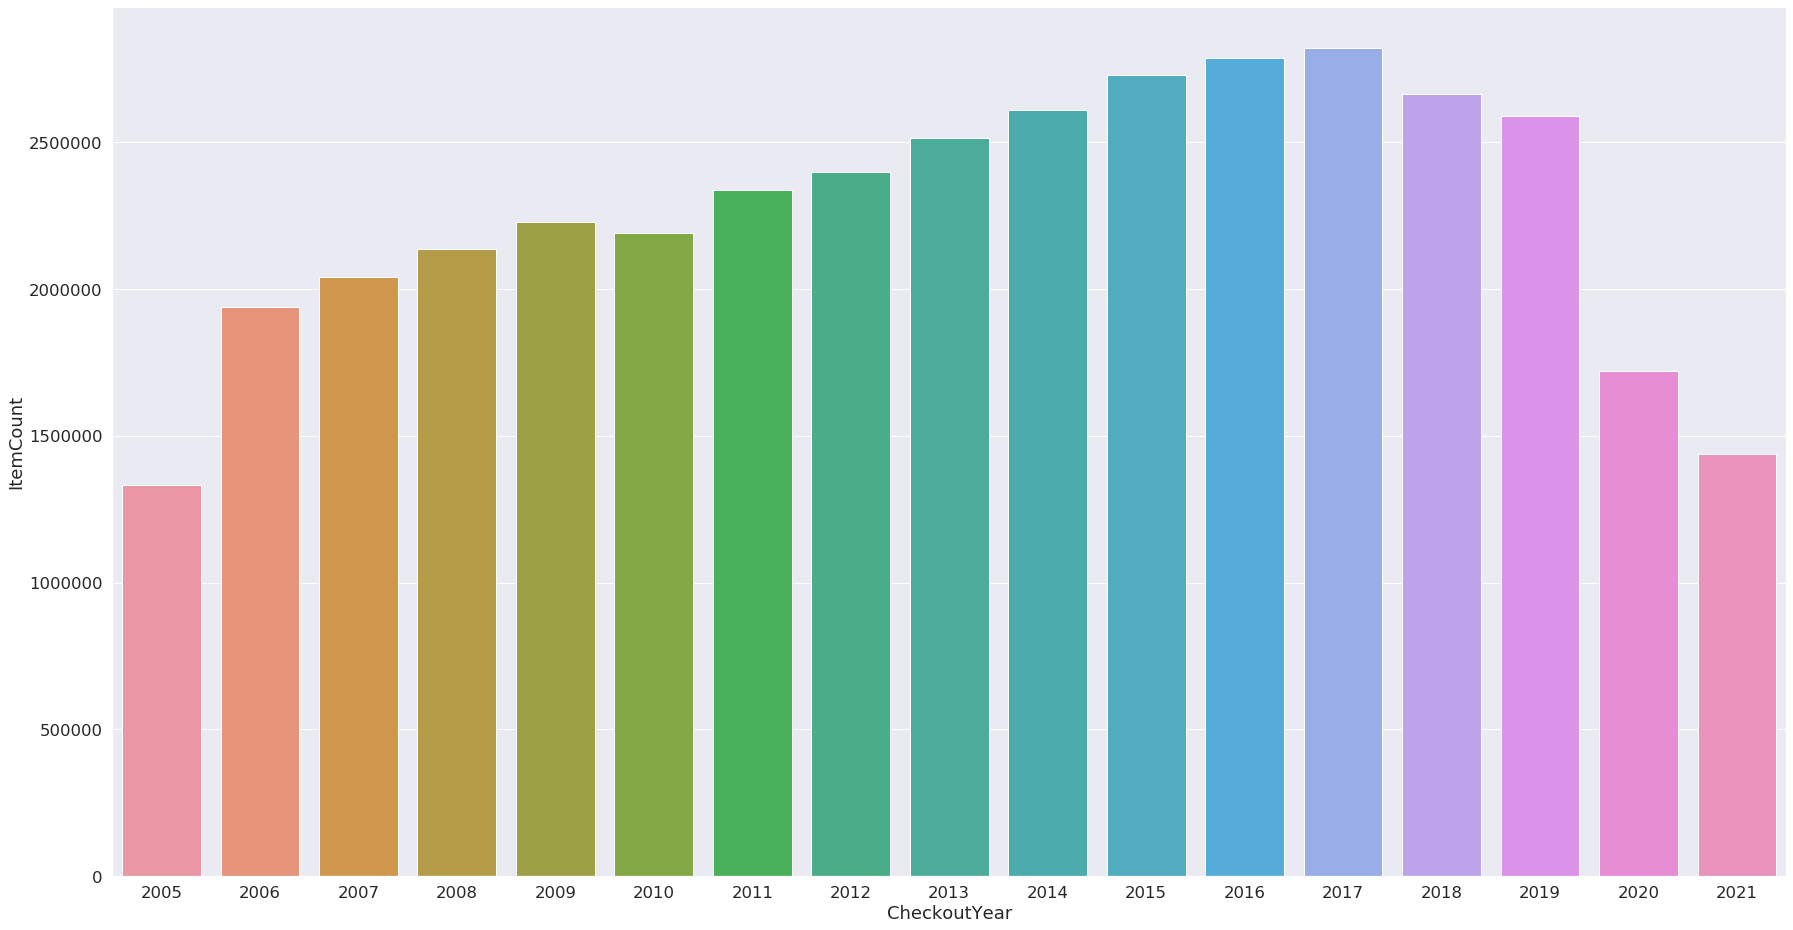

In [29]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='CheckoutYear',y='ItemCount', data=CheckoutYear)

In [30]:
CheckoutType = data['CheckoutType'].value_counts(ascending=True)
CheckoutType = pd.DataFrame(CheckoutType[-50:]).reset_index()
CheckoutType.columns = ["CheckoutType", "ItemCount"]
CheckoutType.head(5)

,CheckoutType,ItemCount
0,Zinio,9175
1,Hoopla,291737
2,Freegal,969118
3,OverDrive,7843266
4,Horizon,29357612


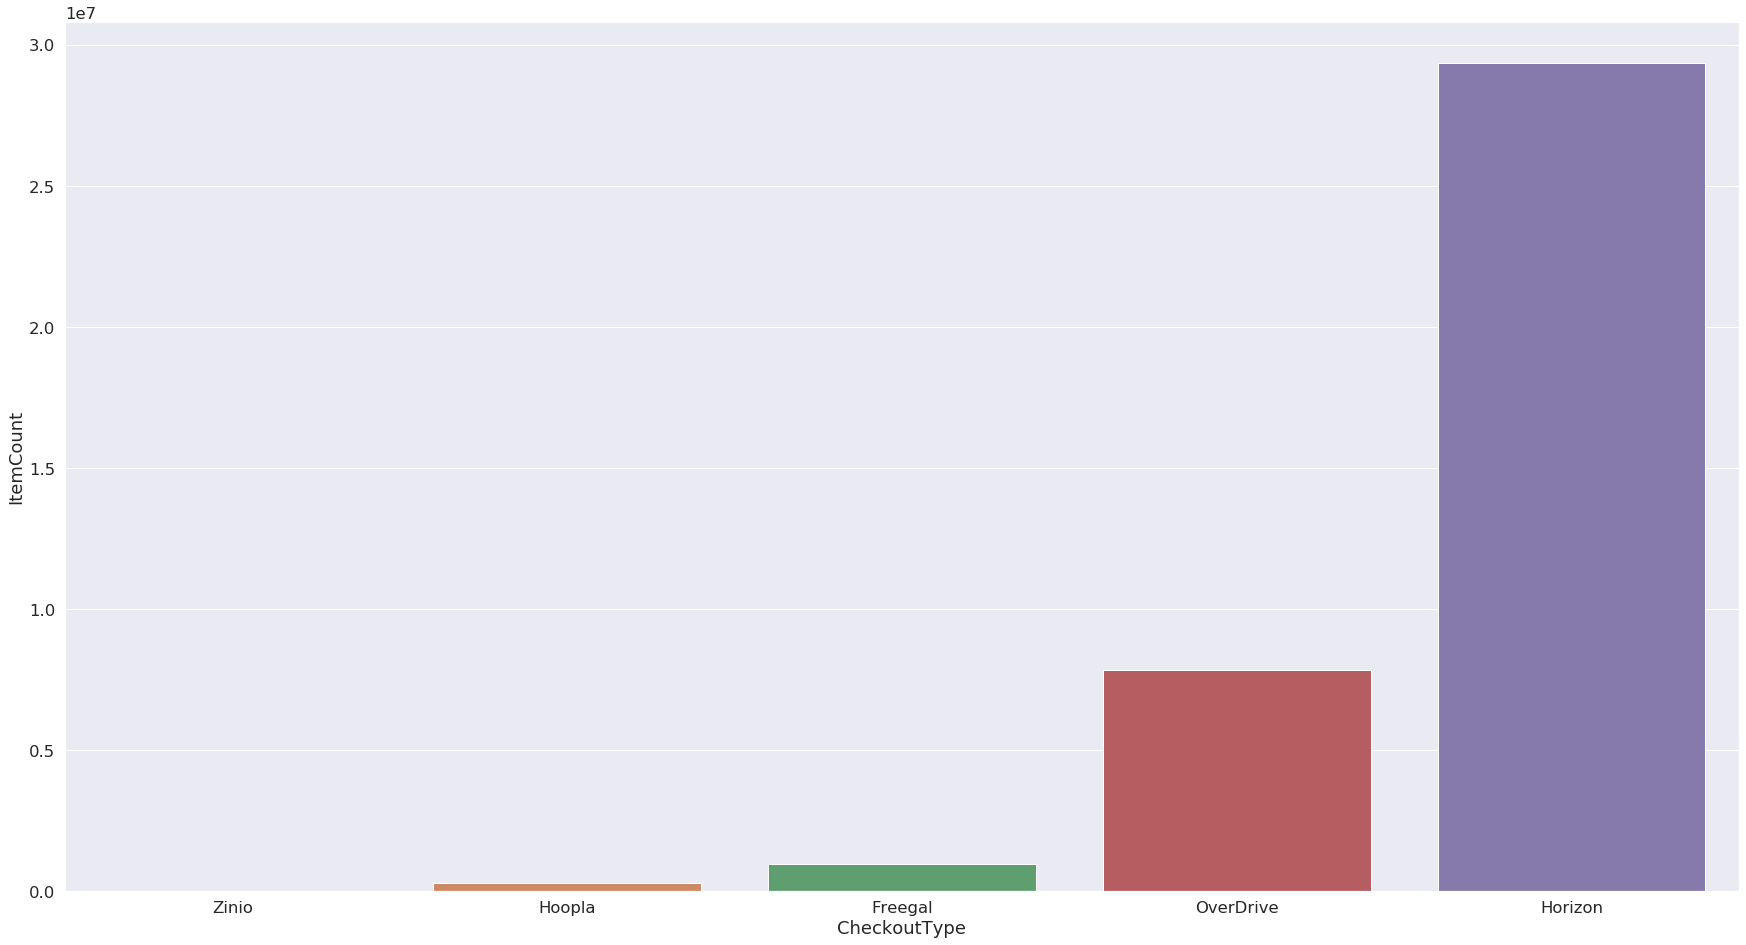

In [32]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='CheckoutType',y='ItemCount', data=CheckoutType)

In [42]:
lor = data[data['Title'].str.contains("The Lord of the Rings")]

In [43]:
np.unique(lor['Title'])[0:10]

array(['"A Storm Is Coming" (From "The Lord of the Rings: The Return of the King")',
       'CliffsNotes on Tolkien;s The Lord of the Rings & The Hobbit',
       'J.R.R. Tolkien and the Birth Of "The Lord of the Rings" And "The Hobbit"',
       'May It Be (From "The Lord of the Rings: The Fellowhip of the Ring")',
       'The Breaking of the Fellowship / May It Be (From "The Lord of the Rings: The Fellowship of the Ring")',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (abridged, dramatized performance)',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (abridged, dramatized performance) (Abridged, Dramatized Performance)',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (unabridged selections)',
       'The Fellowship of the Ring: The Lord of the Rings Series, Book 1 (unabridged selections) (Unabridged Selections)'],
      dtype=object)

In [50]:
lor_checkouts_by_date = lor.groupby(['CheckoutYear', 'CheckoutMonth']).sum('Checkouts').reset_index()
lor_checkouts_by_date['Date'] = pd.to_datetime( lor_checkouts_by_date['CheckoutYear']*100+ lor_checkouts_by_date['CheckoutMonth'], format="%Y%m")
lor_checkouts_by_date.tail()

,CheckoutYear,CheckoutMonth,Checkouts,Date
192,2021,4,304,2021-04-01
193,2021,5,357,2021-05-01
194,2021,6,328,2021-06-01
195,2021,7,367,2021-07-01
196,2021,8,404,2021-08-01


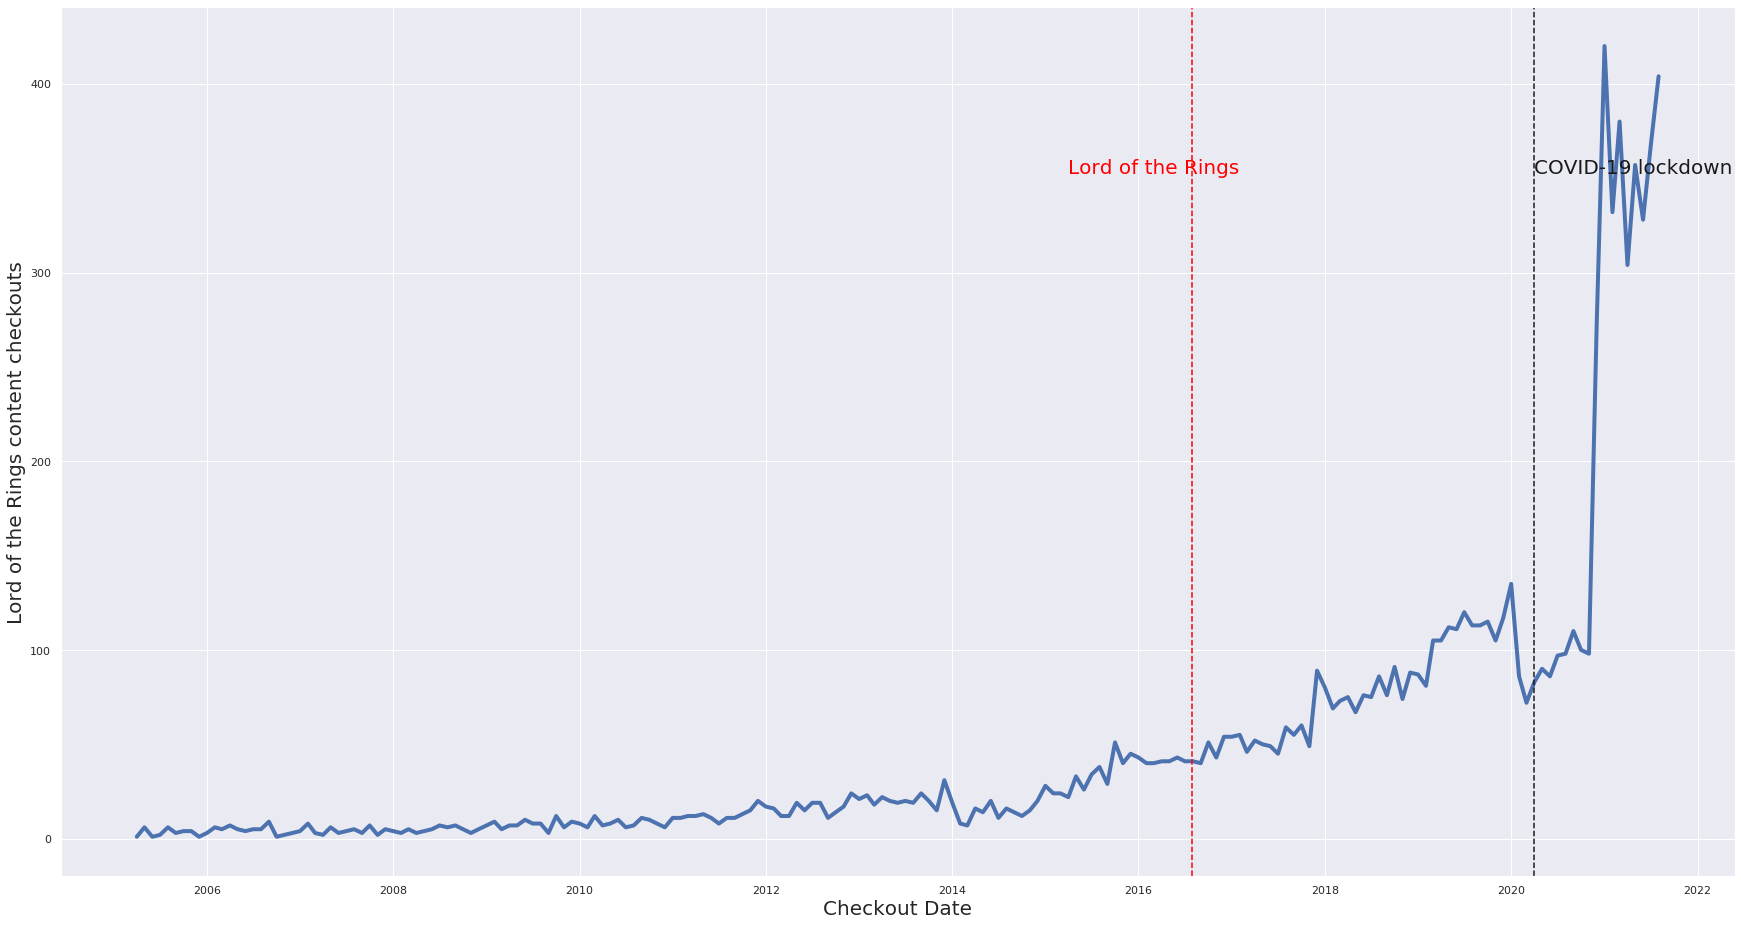

In [56]:
lor = sns.lineplot(x = "Date", y = "Checkouts", data = lor_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
lor.set_xlabel("Checkout Date", fontsize = 20)
lor.set_ylabel("Lord of the Rings content checkouts", fontsize = 20)
lor.axvline(datetime(2016, 7, 30), color="red", linestyle = "--")
lor.axvline(datetime(2020, 4, 1), color="k", linestyle = "--")
lor.text(datetime(2013, 1, 1), .7, 'Lord of the Rings', color="red", fontsize = 20, transform=trans)
lor.text(datetime(2018, 1, 1), .7, 'COVID-19 lockdown', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
lor

In [36]:
potter = data[data['Title'].str.contains("Harry Potter and")]

In [37]:
np.unique(potter['Title'])[0:10]
# Dataset contains Harry Potter related contents

array(['Haeri Poto wa Ajukaban ui choesu Harry Potter and the prisoner of Azkaban',
       "Haeri Pʻotʻŏ wa mabŏpsa ŭi tol = Harry Potter and the philosopher's stone / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.",
       'Haeri Pʻotʻŏ wa pimil ŭi pang = Harry Potter and the chamber of secrets / Joaen K. Rolling chiŭm ; Kim Hye-wŏn omgim.',
       'Haeri Pʻotʻŏ wa pul ŭi chan = Harry Potter and the goblet of fire / Joaen K. Rolling chiŭm ; Kim Hye-wŏn, Chʻoe In-ja omgim.',
       'Hali Bote : huo bei de kao yan = [Harry Potter and the goblet of fire] / J.K. Luolin (J.K. Rowling), zhu ; Peng Qianwen, yi.',
       "Hali Bote yu mo fa shi = Harry Potter and the philosopher's stone / [Ying] J.K. Luolin, zhu ; Su Nong, yi.",
       'Hari Potta to Azukaban no shujin Harry Potter and the prisoner of Azkaban',
       'Hari Potta to fujicho no kishidan = Harry Potter and the Order of the Phoenix / J.K. Rowling cho ; Matsuoka Yūko yaku.',
       'Hari Potta to himitsu no heya Harry Potter and the

In [47]:
potter_checkouts_by_date = potter.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
potter_checkouts_by_date['Date'] = pd.to_datetime( potter_checkouts_by_date['CheckoutYear']*100 + potter_checkouts_by_date['CheckoutMonth'], format="%Y%m")
# 10000 are here to easily convert 20214 to 202104 which can easily be read as april 2021
potter_checkouts_by_date.tail()

,CheckoutYear,CheckoutMonth,Checkouts,Date
192,2021,4,1339,2021-04-01
193,2021,5,1311,2021-05-01
194,2021,6,1381,2021-06-01
195,2021,7,1511,2021-07-01
196,2021,8,1438,2021-08-01


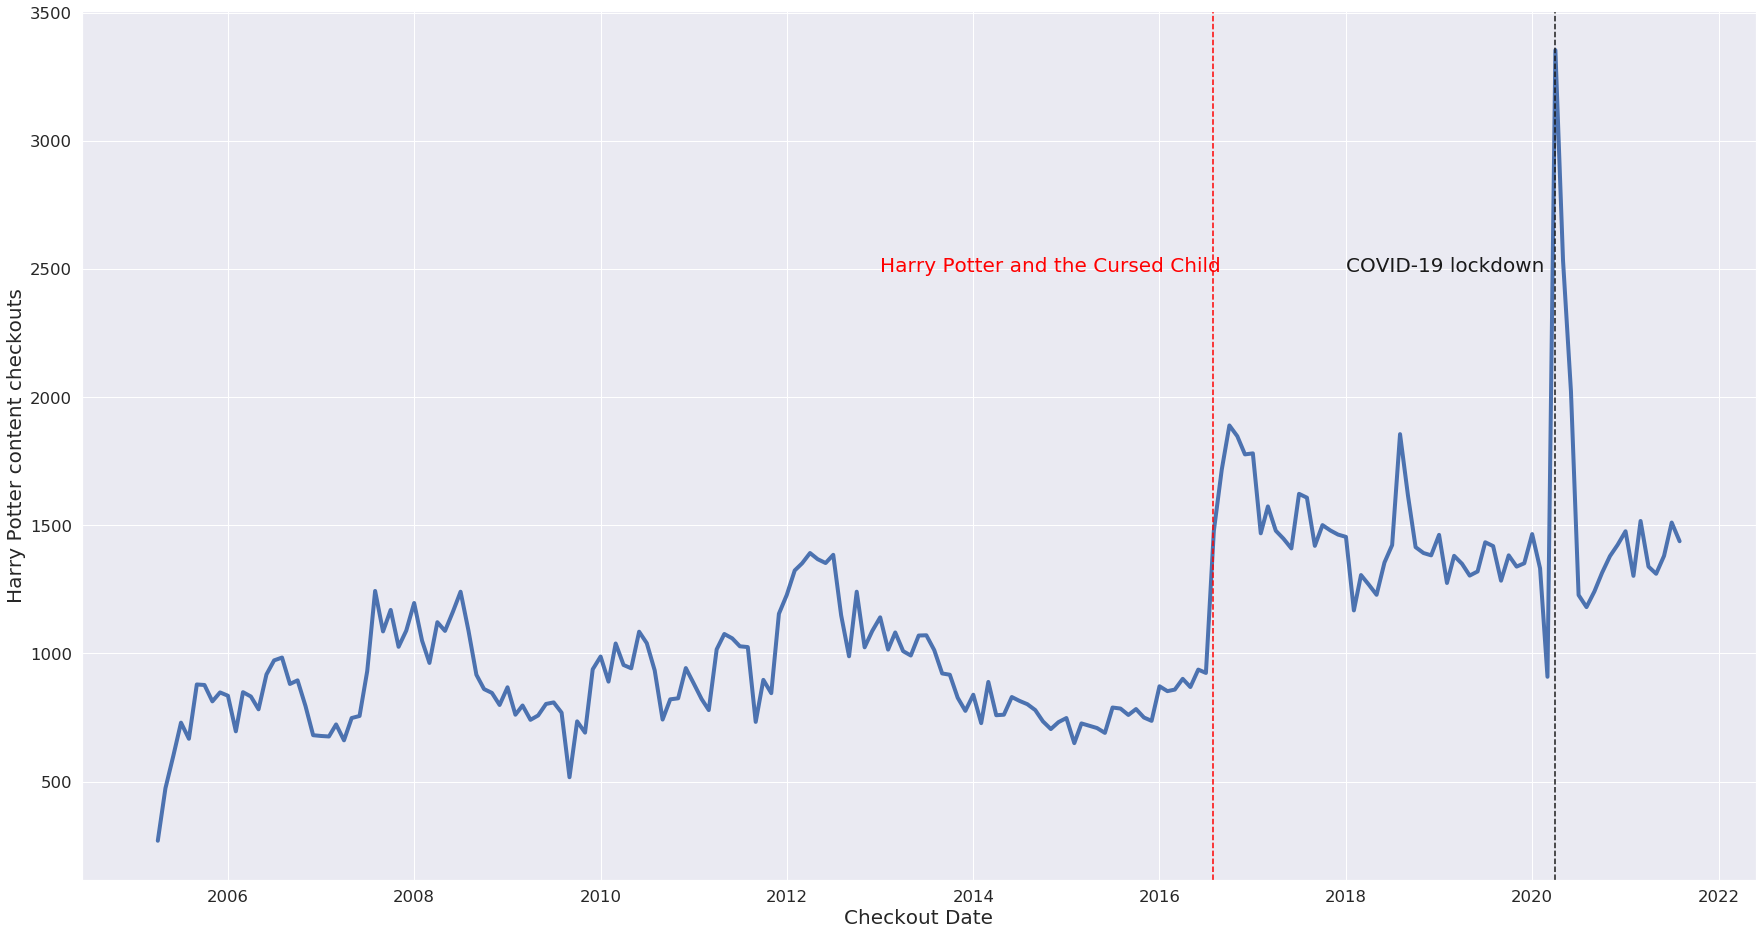

In [39]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = potter_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Harry Potter content checkouts", fontsize = 20)
p.axvline(datetime(2016, 7, 30), color="red", linestyle = "--")
p.axvline(datetime(2020, 4, 1), color="k", linestyle = "--")
p.text(datetime(2013, 1, 1), .7, 'Harry Potter and the Cursed Child', color="red", fontsize = 20, transform=trans)
p.text(datetime(2018, 1, 1), .7, 'COVID-19 lockdown', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

### Were people really reading more during first weeks of Covid lockdowns?

In [8]:
checkouts_by_month = data.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts')

In [9]:
checkouts_by_month = checkouts_by_month.reset_index()
checkouts_by_month['Date'] = pd.to_datetime(
    checkouts_by_month['CheckoutYear']*100 + checkouts_by_month['CheckoutMonth'], format="%Y%m"
)

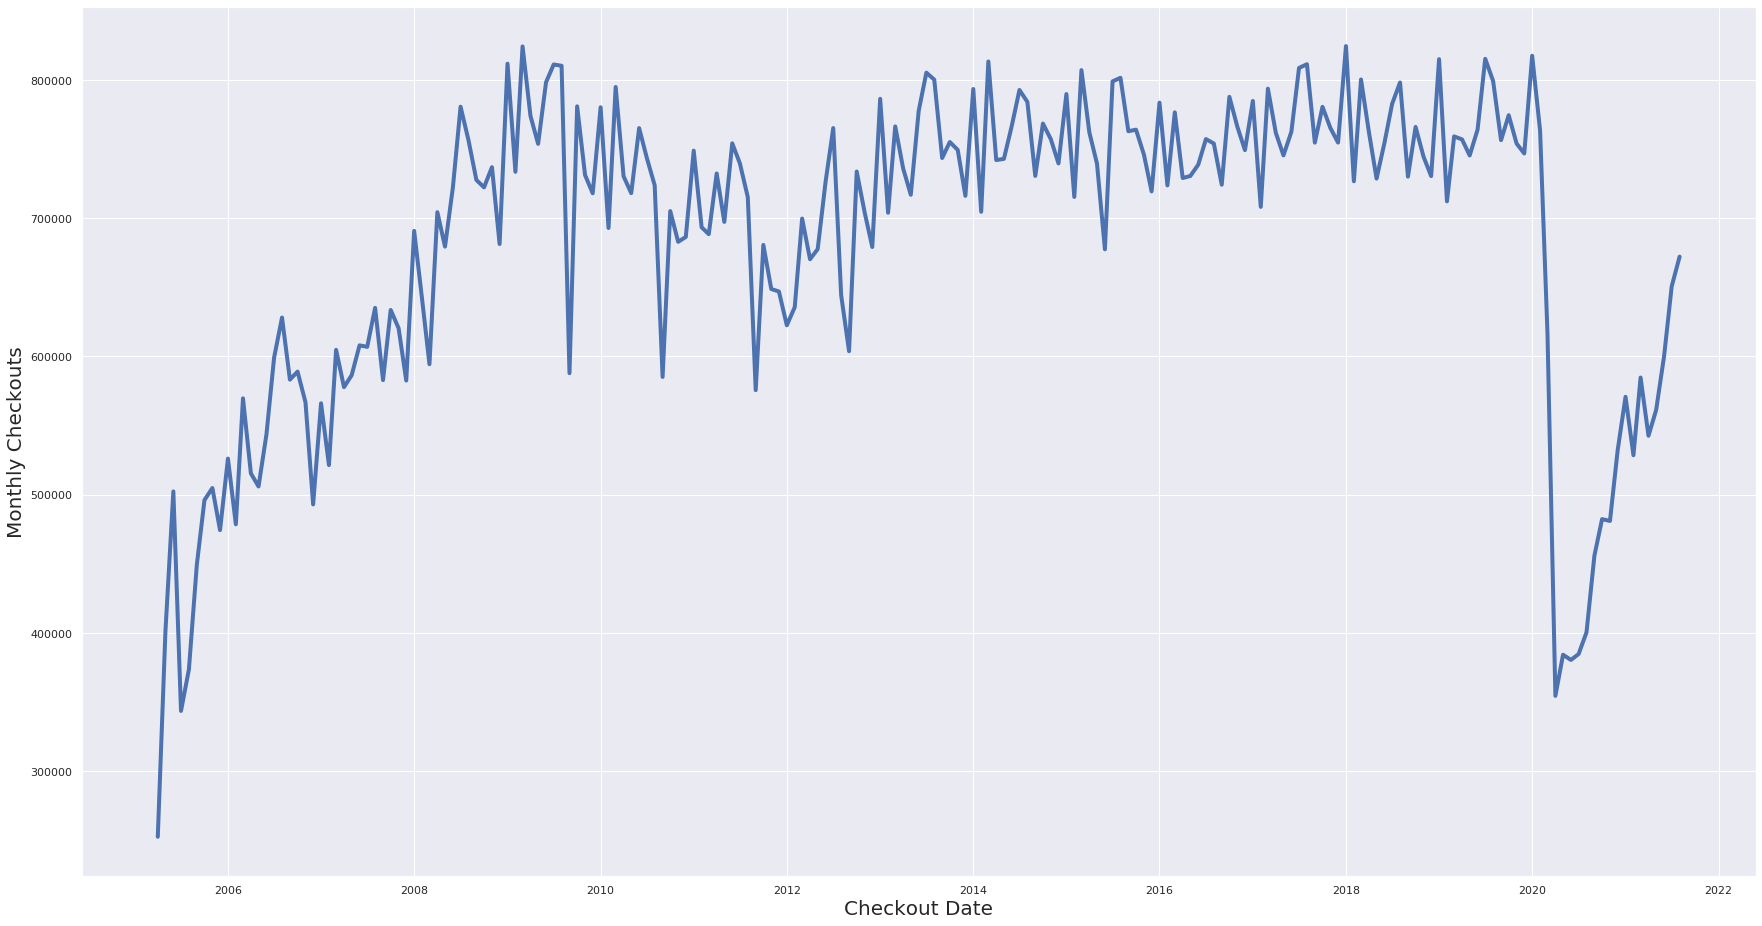

In [10]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = checkouts_by_month, linewidth=4)
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Monthly Checkouts", fontsize = 20)
sns.set(rc={'figure.figsize':(30,16)})
p

Overall we can see that dramatic events of 2020 decreased checkouts amount in 2020 and 2021, but Harry Potter was more popular than ever on the other hand. That's why I wonder: which titles were most popular in the first half of 2020?

In [11]:
covid_data = data[(data['CheckoutYear'] == 2020) & (data['CheckoutMonth'].isin(range(1, 7)))]

In [12]:
covid_data_top_n = covid_data.groupby(data['Title']).sum('Checkouts').nlargest(10, columns=['Checkouts'])

In [13]:
covid_data_top_n

,CheckoutYear,CheckoutMonth,Checkouts
Title,,,
So You Want to Talk about Race (Unabridged),12120,21,6751
"Harry Potter and the Sorcerer's Stone: Harry Potter Series, Book 1 (unabridged) (Unabridged)",12120,21,4128
Becoming (Unabridged),12120,21,3577
Becoming,12120,21,3526
FlexTech--Laptops.,6060,6,3451
Educated: A Memoir,12120,21,3006
Where the Crawdads Sing,12120,21,2889
Headphones / Seattle Public Library.,6060,6,2814
White Fragility: Why It's So Hard for White People to Talk About Racism,12120,21,2499


Exporing this shortlist, we can see that two of the titles can be related to a BLM movement. Let's grab some keywords and select titles which could be related to those events and check their popularity over time.

In [14]:
keywords = ['racism', 'race', 'people of color', 'white people', 'police brutality', 'martin luther king', 'skin color']
data['Title_lower'] = data['Title'].str.lower()

In [15]:
blm = data[data['Title_lower'].str.contains('|'.join(keywords))]

In [16]:
blm_checkouts_by_date = blm.groupby(['CheckoutYear','CheckoutMonth']).sum('Checkouts').reset_index()
blm_checkouts_by_date['Date'] = pd.to_datetime(
    blm_checkouts_by_date['CheckoutYear']*100 + blm_checkouts_by_date['CheckoutMonth'], format="%Y%m"
)

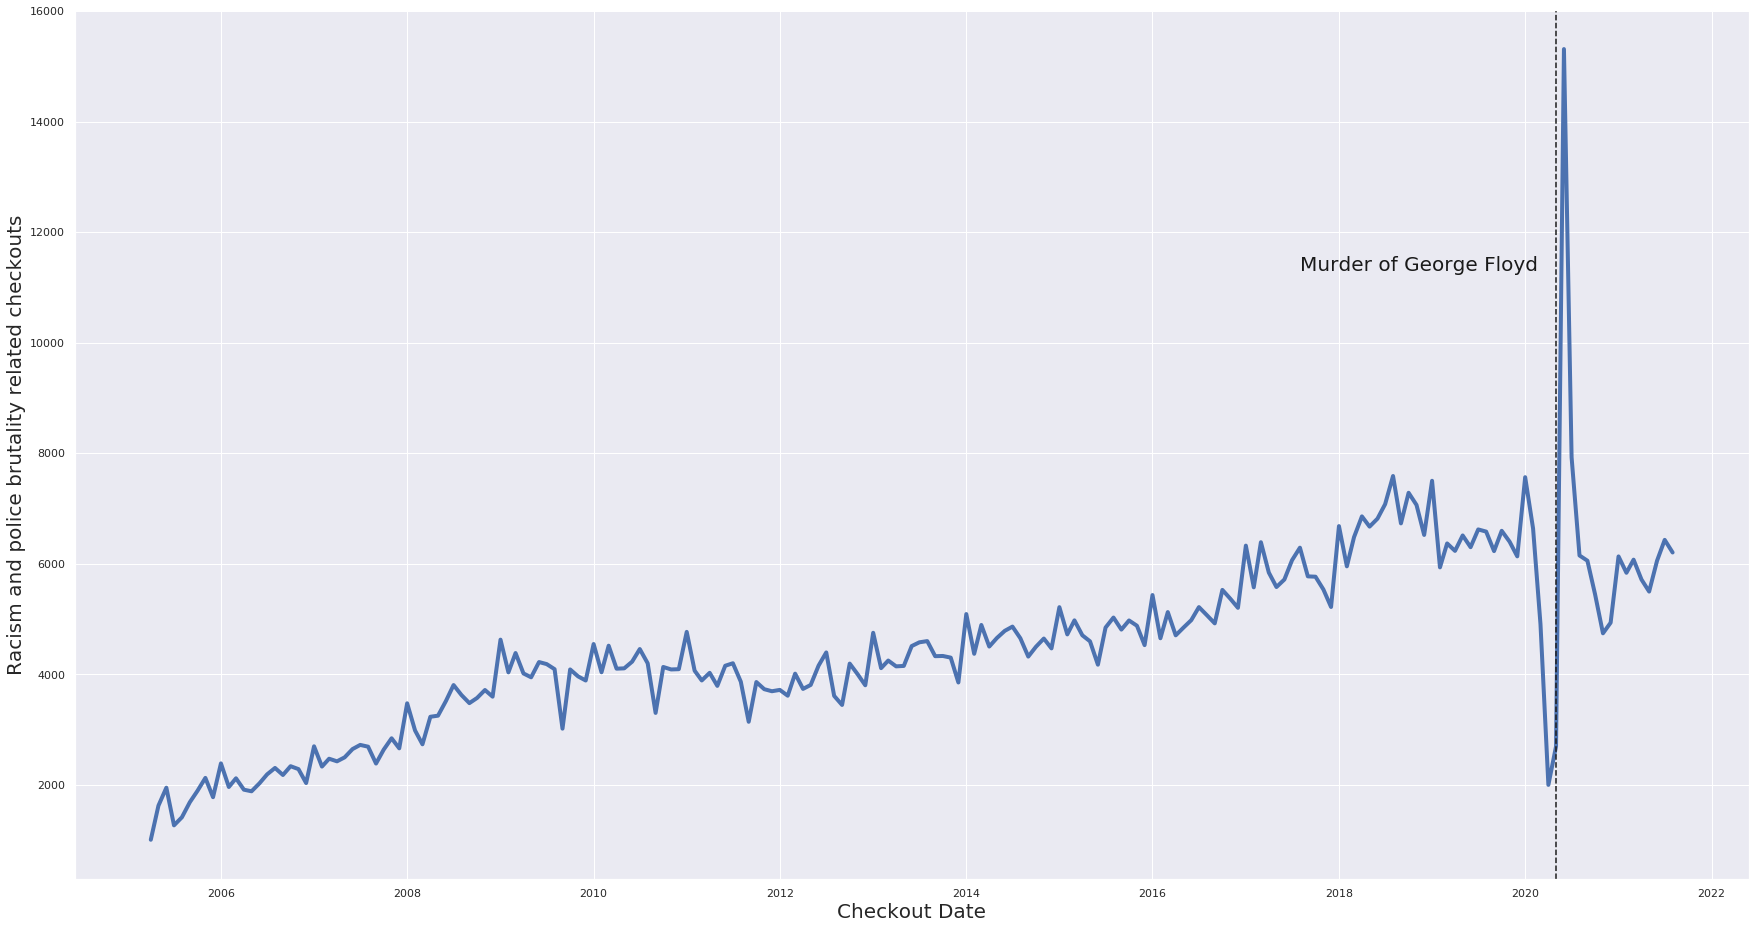

In [17]:
p = sns.lineplot(x = "Date", y = "Checkouts", data = blm_checkouts_by_date, linewidth = 4)
trans = p.get_xaxis_transform()
p.set_xlabel("Checkout Date", fontsize = 20)
p.set_ylabel("Racism and police brutality related checkouts", fontsize = 20)
p.axvline(datetime(2020, 5, 1), color="k", linestyle = "--")
p.text(datetime(2017, 8, 1), .7, 'Murder of George Floyd', color="k", fontsize = 20, transform=trans)
sns.set(rc={'figure.figsize':(30,16)})
p

#### We see a big dip before interest increase, since the murder of George Floyd happened in the May 2020, when the Covid lockdowns were very strict.